# ANALYZE COVID-19 VIRUS

Covid-19 is 2019 Detected virus, spreading all over the world.
Range of case fatality ratio estimates have been produced that differ substantially in magnitude.
I aimed to provide robust estimates, accounting for censoring and ascertainment biases.

In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import date 
from datetime import timedelta 
from datetime import datetime, timedelta,date
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap
from pywaffle import Waffle
# import folium
# !pip install plotly_express
# ! pip uninstall plotly
# ! conda uninstall plotly
# ! conda install -c plotly plotly
# pip install calmap
# pip install pywaffle

The number of new cases are increasing day by day around the world.
This dataset has information from the states and union territories of India at daily level.

DATASETS

COVID-19 cases at daily level is present in covid_19_india.csv file
Individual level details are present in IndividualDetails.csv file and is obtained from this link
Population at state level is present in population_india_census2011.csv file
Number of COVID-19 tests at daily level in ICMRTestingDetails.csv file
Number of hospital beds in each state in present in HospitalBedsIndia.csv file and is extracted from this link

COVID-19 has infected more than 5,000 people in India.
Local governments announces the information of COVID-19 quickly and transparently.
I analyze and visualize the data using various data mining or visualization techniques.
I also analyze to run model to chheck accuracy.

In [88]:
covid_19_india.shape

(708, 9)

In [18]:
Age_Group_Details = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/AgeGroupDetails.csv')
covid_19_india = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/covid_19_india.csv')
HospitalBedsIndia = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/HospitalBedsIndia.csv')
ICMRTestingDetails = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/ICMRTestingDetails.csv')
IndividualDetails = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/IndividualDetails.csv')
Population_india_census2011 = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/Population_india_census2011.csv')

In [19]:
Population_india_census2011.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


I have visualized the data of Covid - 19 in from of tables, pie charts, tremaps, bar graphs etc.to give everyone in the country an idea about the coronavirus disease. 

In [20]:
Age_Group_Details.head(2)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%


In [21]:
# Age_continents_cases = Age_Group_Details.groupby(["AgeGroup"]).sum()
# Age_group_visual = pd.DataFrame(pd.to_numeric(Age_continents_cases.sum()),dtype=np.float64).transpose()
Age_group_visual = Age_Group_Details.groupby(["AgeGroup"]).sum()
Age_group_visual

,Sno,TotalCases
AgeGroup,,
0-9,1,22
10-19,2,27
20-29,3,172
30-39,4,146
40-49,5,112
50-59,6,77
60-69,7,89
70-79,8,28
>=80,9,10


People of all ages can be infected by the new coronavirus (COVID-19). Poeple age of 20-29 and 30-39 are infected more with this virus. WHO advises people of all ages to take steps to protect themselves from the virus, for example by following good hand hygiene and good respiratory hygiene.

In [22]:
# Age_group = Age_Group_Details.groupby('AgeGroup')['TotalCases'].sum().reset_index()
Age_group = Age_Group_Details.melt(id_vars="AgeGroup", value_vars=['TotalCases'],
                 var_name='Case', value_name='Count')

fig = px.scatter(Age_group, x="AgeGroup", y="Count", color='Case', height=600,
             title='Cases over time', marginal_y="violin",marginal_x="box")
# fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()
# import plotly.express as px
# print(px.data.iris.__doc__)
# px.data.iris().head()

# Total Cases of Corona Virus are age of 20-29, 30-39 respectively.

In [23]:
covid_19_india.head(200)
covid_19_india['date'] = pd.to_datetime(covid_19_india['Date'], errors='coerce')
covid_19_india.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-30
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31


Kerala: First state to get a case Maharashtra, Tamil Nadu, Delhi: Top-3 states with most cases found in India

In [13]:
# df = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/covid_19_india.csv', parse_dates=['Date'])
# df['date'] = pd.to_datetime(df['Date'], errors='coerce')
# df['dates'] = df.Date.apply(lambda x: x.strftime('%m-%d-%Y'))
# df.set_index('date', inplace=True)
# df.drop(['Date'], axis =1)
# # df1 = df.groupby(["dates"]).sum()
# plt.figure(figsize=(16,10), dpi= 80)
# calmap.calendarplot(df['2020']['Confirmed'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
# plt.show()


# fig = px.choropleth(covid_19_india, locations="State/UnionTerritory",
#                     color="Deaths", hover_name="Date", title='Confirmed Cases', 
#                     color_continuous_scale="Sunset")
# fig.update(layout_coloraxis_showscale=False)
# fig.show()

In [24]:
covid_19_india_state = covid_19_india.groupby(["State/UnionTerritory"]).sum()
covid_19_india_state.head(2)

,Sno,Cured,Deaths,Confirmed
State/UnionTerritory,,,,
Andaman and Nicobar Islands,6236,0,0,96
Andhra Pradesh,9227,13,7,1041


In [109]:
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [25]:
covid_19_india.iloc[:,1:].corr().style.background_gradient(cmap='Reds')

,Cured,Deaths,Confirmed
Cured,1,0.603154,0.74303
Deaths,0.603154,1,0.707418
Confirmed,0.74303,0.707418,1


In [26]:
fig = px.treemap(covid_19_india.sort_values
                 (by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["State/UnionTerritory"], values="Confirmed", height=500,
                 title='Number of Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(covid_19_india.sort_values
                 (by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["State/UnionTerritory"], values="Deaths", height=500,
                 title='Number of Deaths reported',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [83]:
# covid_19_india = pd.read_csv('/Users/poojapatel/Downloads/covid19-in-india/covid_19_india.csv')

# # Prepare Data
# df = covid_19_india.groupby('Date').size().reset_index(name='counts')
# n_categories = df.shape[0]
# colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# # Draw Plot and Decorate
# fig = plt.figure(
#     FigureClass=Waffle,
#     plots={
#         '111': {
#             'values': df['counts'],
#             'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['Date', 'counts']].itertuples()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
#             'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
#         },
#     },
#     rows=7,
#     colors=colors,
#     figsize=(16, 9)
# )

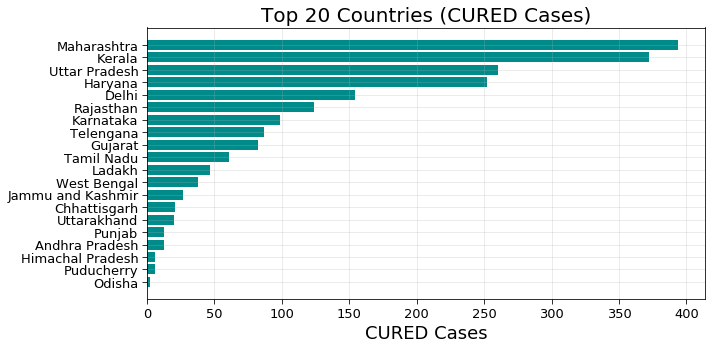

In [83]:
f = plt.figure(figsize=(10,5))
# f.add_subplot(111)
# plt.axes(axisbelow=True)
plt.barh(covid_19_india_state.sort_values('Cured')["Cured"].index[-20:],covid_19_india_state.sort_values('Cured')["Cured"].values[-20:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("CURED Cases",fontsize=18)
plt.title("Top 20 Countries (CURED Cases)",fontsize=20)
plt.grid(alpha=0.3)
# plt.savefig('Top 10 Countries (Cured Cases).png')

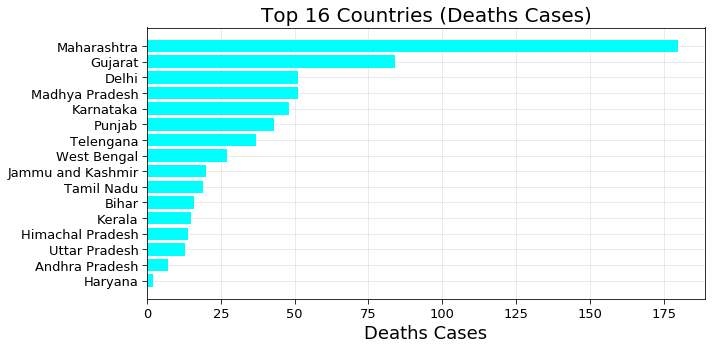

In [82]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(covid_19_india_state.sort_values('Deaths')["Deaths"].index[-16:],covid_19_india_state.sort_values('Deaths')["Deaths"].values[-16:],color="cyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 16 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)

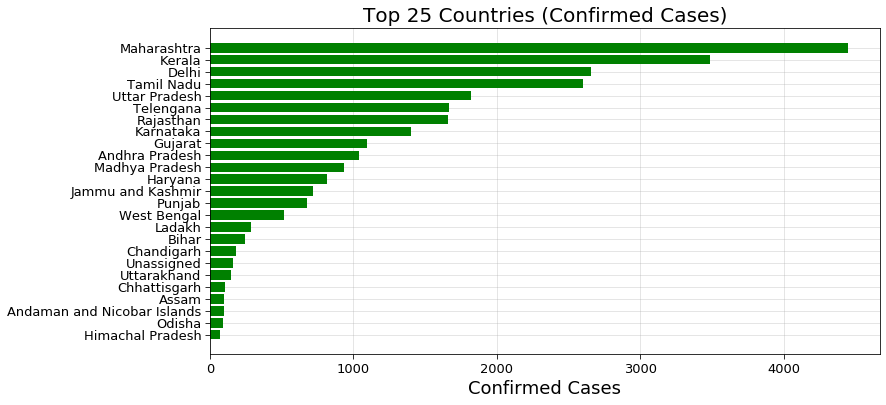

In [75]:
f = plt.figure(figsize=(12,6))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(covid_19_india_state.sort_values('Confirmed')["Confirmed"].index[-25:],covid_19_india_state.sort_values('Confirmed')["Confirmed"].values[-25:],color="green")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 25 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.4)

# Maharashtra Have Higher case for death, cured and confirmed. 

In [27]:
HospitalBedsIndia.head(2)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN


In [28]:
HospitalBedsIndia_state = HospitalBedsIndia.groupby(["State/UT"]).sum()
HospitalBedsIndia_state.head(2)

,Sno,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
State/UT,,,,,,,
All India,37.0,19810.0,279588.0,3772.0,431173.0,0.0,0.0
Andaman & Nicobar Islands,1.0,27.0,575.0,3.0,500.0,0.0,0.0


In [29]:
covid_19_cases = covid_19_india_state.loc['Maharashtra']
covid_19_available = HospitalBedsIndia_state.loc['Maharashtra']
covid_19_cases

Sno          9767
Cured         394
Deaths        180
Confirmed    4447
Name: Maharashtra, dtype: int64

In [30]:
covid_19_available

Sno                           21.0
NumRuralHospitals_NHP18      273.0
NumRuralBeds_NHP18         12398.0
NumUrbanHospitals_NHP18      438.0
NumUrbanBeds_NHP18         39048.0
Unnamed: 12                    0.0
Unnamed: 13                    0.0
Name: Maharashtra, dtype: float64

In [31]:
df_merge = pd.concat([covid_19_india_state, HospitalBedsIndia_state], axis=1, sort=False)
df_merge = df_merge.loc['Maharashtra']
df_merge

Sno                         9767.0
Cured                        394.0
Deaths                       180.0
Confirmed                   4447.0
Sno                           21.0
NumRuralHospitals_NHP18      273.0
NumRuralBeds_NHP18         12398.0
NumUrbanHospitals_NHP18      438.0
NumUrbanBeds_NHP18         39048.0
Unnamed: 12                    0.0
Unnamed: 13                    0.0
Name: Maharashtra, dtype: float64

In [34]:
# (180/4447)*100
df_merge['Negative_rate'] = (df_merge['Deaths'] / df_merge['Confirmed'])*100
df_merge['Positive_rate'] = (df_merge['Cured'] / df_merge['Confirmed'])*100
df_merge

Sno                         9767.000000
Cured                        394.000000
Deaths                       180.000000
Confirmed                   4447.000000
Sno                           21.000000
NumRuralHospitals_NHP18      273.000000
NumRuralBeds_NHP18         12398.000000
NumUrbanHospitals_NHP18      438.000000
NumUrbanBeds_NHP18         39048.000000
Unnamed: 12                    0.000000
Unnamed: 13                    0.000000
Negative_rate                  4.047673
Positive_rate                  8.859906
Name: Maharashtra, dtype: float64

4% people death due to covid 19 by confirmed case.
Negative_rate = 4.047673 and
Positive_rate = 8.859906

8.6 % covid patient occupied bed in Maharashtra.

In [53]:
ICMRTestingDetails.head(2)
ICMRTestingDetail = ICMRTestingDetails.drop(['SNo'], axis = 1)
ICMRTestingDetai = ICMRTestingDetail.drop(['Source'], axis = 1)
ICMRTestingDetai.head(2)

,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
0,13/03/20 0:00,6500,5900,78
1,18/03/20 18:00,13125,12235,150


# STATE WISE TotalSamplesTested, TotalIndividualsTested AND TotalPositiveCases CASES of COVID-19

In [121]:
temp_f = ICMRTestingDetai.sort_values(by='TotalPositiveCases', ascending=False)
# temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='YlOrRd')

,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
15,25/03/20 20:00,25144,24254,581
14,25/03/20 10:00,22928,22038,539
13,24/03/20 20:00,22694,21804,536
12,24/03/20 10:00,20864,19974,482
11,23/03/20 20:00,20707,19817,471
10,23/03/20 10:00,18383,17493,415
9,22/03/20 18:00,18127,17237,396
8,22/03/20 10:00,16999,16109,341
7,21/03/20 18:00,16911,16021,315
6,21/03/20 10:00,15701,14811,271


In [55]:
merge_temp_covid = pd.concat([covid_19_india, ICMRTestingDetails], axis=1, sort=False)
merge_temp_covid.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-30,1.0,13/03/20 0:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,2020-01-31,2.0,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2020-01-02,3.0,19/03/20 10:00,13316.0,12426.0,168.0,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-02-02,4.0,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,2020-03-02,5.0,20/03/20 10:00,14376.0,13486.0,206.0,ICMR_website_update_20March_10AM_IST.pdf


In [112]:
# fig = px.choropleth(merge_temp_covid, locations="State/UnionTerritory",locationmode='country names',
#                     color="TotalPositiveCases", hover_name="Confirmed", title='Confirmed Positive Cases', 
#                     range_color=[1,50], color_continuous_scale="agsunset")
# fig.update(layout_coloraxis_showscale=False)
# fig.update_layout(margin=dict(t=80,l=1,r=1,b=0))
# # fig.write_image('covid-eda-1-1.png')
# fig.show()


In [122]:
fig = px.scatter(temp_f.sort_values('TotalSamplesTested', ascending=True).iloc[:, :],
                 x='TotalSamplesTested', y='TotalPositiveCases', color='TotalPositiveCases', size='TotalIndividualsTested', height=1000,
                 text='TotalPositiveCases', #log_x=True, log_y=True, 
                 title='Total Sample Tested vs Total Positive Cases')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

In [331]:
IndividualDetails.head(2)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan


In [391]:
temp = IndividualDetails.groupby('diagnosed_date')['detected_state', 'current_status'].sum()
temp = temp.reset_index()
temp = temp.melt(id_vars='diagnosed_date', value_vars=['detected_state', 'current_status'],
                var_name='Reported', value_name='Count')
fig = px.line(temp, x="diagnosed_date", y="Count", color='Reported', facet_col="Reported",
              title='Number of cases')
fig.show()

Identifying how the population impacts Covid-19 will help authorities manage their fighting back processes better. 
Because Covid-19 is an airborne disease and can easily spread in close contact from human to human, does this place populated areas at greater risk?
Would we continue to see higher deaths and cases in urban areas? Such are logical premises.

In [125]:
Population_india_census = Population_india_census2011.groupby(["State / Union Territory"]).sum()
Population_india_census.head(20)

,Sno,Population,Rural population,Urban population,Gender Ratio
State / Union Territory,,,,,
Andaman and Nicobar Islands,34,380581,237093,143488,876
Andhra Pradesh,10,49577103,34966693,14610410,993
Arunachal Pradesh,26,1383727,1066358,317369,938
Assam,15,31205576,26807034,4398542,954
Bihar,3,104099452,92341436,11758016,918
Chandigarh,32,1055450,28991,1026459,818
Chhattisgarh,17,25545198,19607961,5937237,991
Dadra and Nagar Haveli and Daman and Diu,33,585764,243510,342254,711
Delhi,29,16787941,419042,16368899,868


In [124]:
HospitalBedsIndia_state = HospitalBedsIndia.groupby(["State/UT"]).sum()
HospitalBedsIndia_state.head(20)

,Sno,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
State/UT,,,,,,,
All India,37.0,19810.0,279588.0,3772.0,431173.0,0.0,0.0
Andaman & Nicobar Islands,1.0,27.0,575.0,3.0,500.0,0.0,0.0
Andhra Pradesh,2.0,193.0,6480.0,65.0,16658.0,0.0,0.0
Arunachal Pradesh,3.0,208.0,2136.0,10.0,268.0,0.0,0.0
Assam,4.0,1176.0,10944.0,50.0,6198.0,0.0,0.0
Bihar,5.0,930.0,6083.0,103.0,5936.0,0.0,0.0
Chandigarh,6.0,0.0,0.0,4.0,778.0,0.0,0.0
Chhattisgarh,7.0,169.0,5070.0,45.0,4342.0,0.0,0.0
Dadra & Nagar Haveli,8.0,10.0,273.0,1.0,316.0,0.0,0.0


In Maharashta COVID-19 cases are higher, Mumbai population is also density and compared to population there will shortage of hospitals an dbed if numbers are continue increase. 

In [123]:
merging = pd.concat([HospitalBedsIndia_state,Population_india_census], axis = 1, sort = True)
merging.head()

,Sno,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13,Sno,Population,Rural population,Urban population,Gender Ratio
All India,37.0,19810.0,279588.0,3772.0,431173.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Andaman & Nicobar Islands,1.0,27.0,575.0,3.0,500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Andaman and Nicobar Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,380581.0,237093.0,143488.0,876.0
Andhra Pradesh,2.0,193.0,6480.0,65.0,16658.0,0.0,0.0,10.0,49577103.0,34966693.0,14610410.0,993.0
Arunachal Pradesh,3.0,208.0,2136.0,10.0,268.0,0.0,0.0,26.0,1383727.0,1066358.0,317369.0,938.0


I firmly believe in and trust the country and the world's
healthcare experts to tackle the virus in the best way possible.
There are plenty of analyzes, dashboards, observations, models, predictions provided by the group and we are
very grateful to all the organizations that publicly collect and distribute data to promote these analyses. 

COVID-19 is still an uncertain contagious disease, meaning we can only get specific SEIR after the epidemic ends.
The spreads of outbreaks are largely determined by the politics and social responsibility of each nation.
Although data transparency within government is important, it is therefore our duty not to spread unverified news and remain calm in this situation. 